# 安裝pkgo專案所需要的模組庫及匯入套件

In [1]:
!apt -qq install proj-bin libproj-dev libgeos-dev
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6


E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?
E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?
E: Could not open lock file /var/lib/dpkg/lock - open (13: Permission denied)
E: Unable to lock the administration directory (/var/lib/dpkg/), are you root?
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-req-build-tdzug_us/setup.py'"'"'; __file__='"'"'/tmp/pip-req-build-tdzug_us/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-req-build-tdzug_us/pip-e

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle


import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib inline

import requests



In [2]:
# !pip uninstall tensorflow -y
# !pip install tensorflow==1.13.1

In [3]:

from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import Adam
''' Import l1,l2 (regularizer) '''
# from keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.regularizers import l1_l2



Using TensorFlow backend.


# 下載且準備pkgo專案所需的資料集

In [4]:
pkgo = pd.read_csv('./pkgo_train.csv',index_col=False)
pkgo_test = pd.read_csv('./pkgo_test.csv',index_col=False)

In [5]:
pkgo.shape 
#藉由shape得知，pkgo為一個二維矩陣的資料
#目前已知資料有7160筆，184個features

(7160, 184)

In [6]:
print('pkgo 一共有 {} 筆資料樣本，{} 個資料欄位'.format(pkgo.shape[0], pkgo.shape[1]))

pkgo 一共有 7160 筆資料樣本，184 個資料欄位


In [7]:
pkgo.head()

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,...,False,False,False,False,False,False,False,False,False,2
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,...,False,False,False,False,False,False,False,False,False,5
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,...,False,False,False,False,False,False,False,False,False,3
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,morning,11,10,0,True,Hobart,Australia,Clear,12.7,...,False,False,False,False,False,False,False,False,False,4
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.1,...,False,False,False,False,False,False,False,False,False,3


In [8]:
pkgo_test.head()

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,...,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,...,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,...,False,False,False,False,False,False,False,False,False,False
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,morning,7,38,13,True,London,Europe,MostlyCloudy,18.5,...,False,False,False,False,False,False,False,False,False,False
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,night,1,27,12,False,Chicago,America,Clear,20.2,...,False,False,False,False,False,False,False,False,False,False


In [9]:
pkgo_test.shape

(1791, 183)

In [10]:
pkgo.shape

(7160, 184)

In [11]:
print('before set options :',pd.get_option('display.max_columns'))

#自定義選項，使columns能夠全盤顯示
pd.set_option('display.max_columns',pkgo.shape[1])
print('after set options :',pd.get_option('display.max_columns'))
pkgo.head(1)

before set options : 20
after set options : 184


,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.0,1008.96,clear-day,6019.0444,True,True,True,False,0.523759,False,False,False,True,True,True,0.14412,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2


In [12]:
pkgo.columns.values #在pkgo的csv檔中，所有Features的值

array(['ID', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute',
       'terrainType', 'closeToWater', 'city', 'continent', 'weather',
       'temperature', 'windSpeed', 'pressure', 'weatherIcon',
       'population_density', 'urban', 'suburban', 'midurban', 'rural',
       'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m',
       'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm',
       'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m',
       'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1',
       'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7',
       'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13',
       'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19',
       'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25',
       'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31',
       'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37',
       'cooc_38', 'cooc_39', '

In [13]:
pkgo_test.head()

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,2.69,1018.02,partly-cloudy-day,1573.44080,True,True,True,False,0.298720,False,False,True,True,True,True,0.012588,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,13.00,1009.17,partly-cloudy-day,4188.39100,True,True,True,False,0.212500,False,True,True,True,True,True,0.164427,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,9.15,1016.55,partly-clo

In [14]:
pkgo_test.rename(columns = {'id':'ID'}, inplace=True)


In [15]:
pkgo_test.head()

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,2.69,1018.02,partly-cloudy-day,1573.44080,True,True,True,False,0.298720,False,False,True,True,True,True,0.012588,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,13.00,1009.17,partly-cloudy-day,4188.39100,True,True,True,False,0.212500,False,True,True,True,True,True,0.164427,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,9.15,1016.55,partly-clo

In [16]:
temp_class = pkgo['class']

In [17]:
pkgo = pkgo.drop(columns=['class'])

In [18]:
pkgo_all = pd.concat((pkgo,
                     pkgo_test))

In [19]:
pkgo_all.head()

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,False,False,False,True,True,True,0.144120,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,False,False,False,True,True,True,0.198728,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,False,False

In [20]:
# 取部分Features來觀察數值
view_list = ['appearedTimeOfDay',
             'closeToWater','city', 'population_density',
             'weather', 'pressure','temperature', 'windSpeed']
pkgo_all[view_list].head(10)

,appearedTimeOfDay,closeToWater,city,population_density,weather,pressure,temperature,windSpeed
0,evening,False,Bangkok,6019.04440,Clear,1008.96,27.8,9.00
1,night,True,New_York,0.00000,Clear,1018.96,26.1,8.70
2,evening,True,New_York,0.00000,Clear,1023.22,24.7,16.82
3,morning,True,Hobart,128.89505,Clear,1014.19,12.7,13.25
4,evening,True,Los_Angeles,4188.39100,PartlyCloudy,1011.36,19.1,5.78
5,afternoon,False,Kuching,411.31375,Clear,1011.04,25.0,1.88
6,night,False,Mexico_City,2431.23410,Clear,1018.00,26.7,1.01
7,afternoon,True,New_York,0.00000,Clear,1019.61,29.7,4.82
8,night,False,Chicago,849.44226,PartlyCloudy,1012.09,26.2,6.26
9,afternoon,True,New_York,0.00000,PartlyCloudy,1020.64,28.1,6.43


In [21]:
pkgo_location = pkgo_all[[ 'city', 'continent']].head(10) # 利用city和經緯度的cloumns，來去觀察寶可夢的城市位置。

In [22]:
pkgo_location

,city,continent
0,Bangkok,Asia
1,New_York,America
2,New_York,America
3,Hobart,Australia
4,Los_Angeles,America
5,Kuching,Asia
6,Mexico_City,America
7,New_York,America
8,Chicago,America
9,New_York,America


In [23]:
pkgo_all['city'].value_counts() #統計City中，各個資料樣本筆數。(從此得出，紐約市的寶可夢是最多的！）

New_York       1724
Los_Angeles    1098
Chicago        1095
London          688
Rome            542
               ... 
Adelaide          1
Boise             1
Casablanca        1
Tahiti            1
Louisville        1
Name: city, Length: 75, dtype: int64

# 處理名目資料 (Nominal variables) - 資料前處理
## 標籤編碼：手動編碼
## 以appearedDayOfWeek為例，處理前：

In [24]:
set(pkgo_all['appearedTimeOfDay']) # set 顯示無序不重複元素集，可進行關係測試，刪除重複數據，還可以計算交集、差集、並集等。

{'afternoon', 'evening', 'morning', 'night'}

In [25]:
label_map = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}

#將編碼後的label map存至pkgo['appearedTimeOfDay']中。
pkgo_all['appearedTimeOfDay'] = pkgo_all['appearedTimeOfDay'].map(label_map)

## 檢查資料

In [26]:
set(pkgo_all['appearedTimeOfDay'])

{0, 1, 2, 3}

## 處理Class
**class 0 = Sandshrew**
No.27 

**class 1 = Tentacool**
No.72


**class 2 = Slowpoke**
No.79

**class 3 = Magnemite**
No.81

**class 4 = Voltorb**
No.100

**class 5 = Exeggcute**
No.102

In [27]:
# set(pkgo_all['class']) #暫時不處理

## 標籤編碼：自動編碼
### 以weather為例，處理前

In [28]:
col_list = ['city','continent', 'weather','weatherIcon']
pkgo_all[col_list].iloc[[i for i in range(1,1500,200)]] #取出[1,201,401,601,801,1001,1201,1401]筆資料 - 介於1~1500，間隔200

,city,continent,weather,weatherIcon
1,New_York,America,Clear,clear-night
201,Tokyo,Asia,Clear,clear-night
401,London,Europe,Clear,clear-day
601,London,Europe,Clear,clear-day
801,Chicago,America,PartlyCloudy,partly-cloudy-day
1001,Los_Angeles,America,Clear,clear-day
1201,Rome,Europe,Clear,clear-day
1401,Bangkok,Asia,Clear,clear-day


In [29]:
pkgo_all['city'].unique() #unique 函數去除其中重複的元素，並按元素由大到小返回一個新的無元素重複的元組或者列表

array(['Bangkok', 'New_York', 'Hobart', 'Los_Angeles', 'Kuching',
       'Mexico_City', 'Chicago', 'Rome', 'Tokyo', 'Perth', 'Buenos_Aires',
       'Ljubljana', 'Phoenix', 'Oslo', 'Madrid', 'London', 'Helsinki',
       'Paris', 'Denver', 'Stockholm', 'Warsaw', 'Berlin', 'Zurich',
       'Manila', 'Prague', 'Hong_Kong', 'Guam', 'Sydney', 'Amsterdam',
       'Tunis', 'Brunei', 'Toronto', 'Regina', 'Copenhagen', 'Auckland',
       'Taipei', 'Puerto_Rico', 'Ho_Chi_Minh', 'Detroit', 'Melbourne',
       'Vancouver', 'Monterrey', 'Honolulu', 'Lisbon', 'Vienna',
       'Sao_Paulo', 'Kolkata', 'Bucharest', 'Kuala_Lumpur', 'Dubai',
       'Singapore', 'Indianapolis', 'Montreal', 'Edmonton', 'Athens',
       'Noumea', 'Santiago', 'Luanda', 'Adelaide', 'Zagreb', 'Dublin',
       'Brisbane', 'Karachi', 'Boise', 'Belem', 'Nicosia', 'Tahiti',
       'Casablanca', 'Vilnius', 'Halifax', 'Brussels', 'Jakarta', 'Bahia',
       'Tripoli', 'Louisville'], dtype=object)

In [30]:
#利用scikitlearn的preprocessing做LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#擬合數據後，再將Encoder好的數據轉換上去
le.fit(pkgo_all['city'].unique())
pkgo_all['city'] = le.transform(pkgo_all['city'].values)
le.fit(pkgo_all['weather'].unique())
pkgo_all['weather'] = le.transform(pkgo_all['weather'].values)
le.fit(pkgo_all['weatherIcon'].unique())
pkgo_all['weatherIcon'] = le.transform(pkgo_all['weatherIcon'].values)
le.fit(pkgo_all['continent'].unique())
pkgo_all['continent'] = le.transform(pkgo_all['continent'].values)

In [31]:
pkgo_all[col_list].iloc[[i for i in range(1,1500,200)]]

,city,continent,weather,weatherIcon
1,47,1,4,1
201,65,5,4,1
401,37,7,4,0
601,37,7,4,0
801,15,1,19,4
1001,38,1,4,0
1201,57,7,4,0
1401,5,5,4,0


In [32]:
pkgo_all.head()

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,2,19,10,13,False,5,5,4,27.8,9.00,1008.96,0,6019.04440,True,True,True,False,0.523759,False,False,False,True,True,True,0.144120,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,3,5,19,13,True,47,1,4,26.1,8.70,1018.96,1,0.00000,False,False,False,True,0.565267,False,False,False,True,True,True,0.198728,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,2,19,46,0,True,47,1,4,24.7,16.82,1023.22,0,0.00000,False,False,False,True,0.195366,False,True,True,True,True,True,0.070373,True,True,True,True,True,True,Fa

## 示範欄位的布林值轉0跟1的數值

In [33]:
bool_col = list(pkgo_all.select_dtypes(['bool']).columns)

In [34]:
bool_col = list(pkgo_all.select_dtypes(['bool']).columns)

for c in bool_col:
    pkgo_all[c] = pkgo_all[c].astype(int)

## Pressure Rescale

In [35]:
np.mean(pkgo['pressure'])

1014.9000684357542

In [36]:
np.std(pkgo['pressure'])

5.844732275511988

In [37]:
np.mean(pkgo['population_density'])

1532.7850421723465

In [38]:
np.std(pkgo['population_density'])

2216.538343763716

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
#feature scale normalize
scaler = MinMaxScaler()
pkgo_all['pressure'] = scaler.fit_transform(pkgo_all['pressure'].values.reshape(-1, 1))
pkgo_all['population_density'] = scaler.fit_transform(pkgo_all['population_density'].values.reshape(-1, 1))

In [41]:
pkgo_all['pressure'].max(), pkgo_all['pressure'].min()

(1.0, 0.0)

In [42]:
pkgo_all['population_density'].max(), pkgo_all['population_density'].min()

(1.0, 0.0)

In [43]:
## One-hot encoding

In [44]:
#'appearedTimeOfDay','terrainType','city','weatherIcon','continent','weather'
# pkgo_all['appearedTimeOfDay'] = to_categorical(pkgo_all['appearedTimeOfDay'] )
# pkgo_all['terrainType'] = to_categorical(pkgo_all['terrainType'] )
# pkgo_all['city'] = to_categorical(pkgo_all['city'] )
# pkgo_all['weatherIcon'] = to_categorical(pkgo_all['weatherIcon'] )
# pkgo_all['continent'] = to_categorical(pkgo_all['continent'] )
# pkgo_all['weather'] = to_categorical(pkgo_all['weather'] )

In [45]:
pkgo_all = pd.get_dummies(pkgo_all, columns = ['appearedTimeOfDay','terrainType','city','weatherIcon','continent','weather'])

In [46]:
# dummy_col = ['appearedTimeOfDay','terrainType','city','weatherIcon','continent','weather']

# for c in dummy_col:
#     pkgo[c] = keras.utils.to_categorical(pkgo[c])
    

In [47]:
pkgo_all.head()

,ID,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,...,city_25,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,weatherIcon_0,weatherIcon_1,weatherIcon_2,weatherIcon_3,weatherIcon_4,weatherIcon_5,weatherIcon_6,weatherIcon_7,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5,continent_6,continent_7,continent_8,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,weather_10,weather_11,weather_12,weather_13,weather_14,weather_15,weather_16,weather_17,weather_18,weather_19,weather_20,weather_21,weather_22,weather_23,weather_24
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,19,10,0,27.8,9.00,0.333774,0.601904,1,1,1,0,0.523759,0,0,0,1,1,1,0.144120,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,5,19,1,26.1,8.70,0.598044,0.000000,0,0,0,1,0.565267,0,0,0,1,1,1,0.198728,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,19,46,1,24.7,16.82,0.710624,0.000000,0,0,0,1,0.195366,0,1,1,1,1,1,0.070373,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,11,10,1,12.7,13.25,0.471987,0.012890,0,0,0,1,0.190119,0,1,1,1,1,1,0.003920,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,18,32,1,19.1,5.78,0.397199,0.418839,1,1,1,0,0.066120,1,1,1,1,1,1,0.071638,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [48]:
pkgo_all.shape

(8951, 312)

In [49]:
pkgo=pkgo_all[:7160]
pkgo_test =pkgo_all[7160:]

In [50]:
pkgo.shape

(7160, 312)

In [51]:
pkgo['class']=temp_class

In [52]:
pkgo = pkgo.drop(columns=['ID'])

In [53]:
pkgo.head()

,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,...,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,weatherIcon_0,weatherIcon_1,weatherIcon_2,weatherIcon_3,weatherIcon_4,weatherIcon_5,weatherIcon_6,weatherIcon_7,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5,continent_6,continent_7,continent_8,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,weather_10,weather_11,weather_12,weather_13,weather_14,weather_15,weather_16,weather_17,weather_18,weather_19,weather_20,weather_21,weather_22,weather_23,weather_24,class
0,19,10,0,27.8,9.00,0.333774,0.601904,1,1,1,0,0.523759,0,0,0,1,1,1,0.144120,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,5,19,1,26.1,8.70,0.598044,0.000000,0,0,0,1,0.565267,0,0,0,1,1,1,0.198728,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,19,46,1,24.7,16.82,0.710624,0.000000,0,0,0,1,0.195366,0,1,1,1,1,1,0.070373,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,11,10,1,12.7,13.25,0.471987,0.012890,0,0,0,1,0.190119,0,1,1,1,1,1,0.003920,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,18,32,1,19.1,5.78,0.397199,0.418839,1,1,1,0,0.066120,1,1,1,1,1,1,0.071638,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3


# **Build up the Data**

In [54]:
pkgo_train = pkgo.drop(index=[0,1,2,3]) # drop掉前四筆，結尾用於測試集做辨識
pkgo_val = pkgo.head(4) # 測試集寶可夢
pkgo_val = pkgo_val.drop(columns=['class'])

In [55]:
pkgo_train.head()

,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,...,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,weatherIcon_0,weatherIcon_1,weatherIcon_2,weatherIcon_3,weatherIcon_4,weatherIcon_5,weatherIcon_6,weatherIcon_7,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5,continent_6,continent_7,continent_8,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,weather_10,weather_11,weather_12,weather_13,weather_14,weather_15,weather_16,weather_17,weather_18,weather_19,weather_20,weather_21,weather_22,weather_23,weather_24,class
4,18,32,1,19.1,5.78,0.397199,0.418839,1,1,1,0,0.066120,1,1,1,1,1,1,0.071638,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
5,13,7,0,25.0,1.88,0.388742,0.041131,0,1,1,0,0.486327,0,0,1,1,1,1,0.486327,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
6,4,1,0,26.7,1.01,0.572674,0.243123,1,1,1,0,0.162035,0,1,1,1,1,1,0.020960,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
7,15,19,1,29.7,4.82,0.615222,0.000000,0,0,0,1,0.193740,0,1,1,1,1,1,0.024676,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
8,22,18,0,26.2,6.26,0.416490,0.084944,1,1,1,0,1.713196,0,0,0,0,1,1,1.713196,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
pkgo_train.shape

(7156, 312)

In [57]:
pkgo_val.head()

,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,...,city_25,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,weatherIcon_0,weatherIcon_1,weatherIcon_2,weatherIcon_3,weatherIcon_4,weatherIcon_5,weatherIcon_6,weatherIcon_7,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5,continent_6,continent_7,continent_8,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,weather_10,weather_11,weather_12,weather_13,weather_14,weather_15,weather_16,weather_17,weather_18,weather_19,weather_20,weather_21,weather_22,weather_23,weather_24
0,19,10,0,27.8,9.00,0.333774,0.601904,1,1,1,0,0.523759,0,0,0,1,1,1,0.144120,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,19,1,26.1,8.70,0.598044,0.000000,0,0,0,1,0.565267,0,0,0,1,1,1,0.198728,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,46,1,24.7,16.82,0.710624,0.000000,0,0,0,1,0.195366,0,1,1,1,1,1,0.070373,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,10,1,12.7,13.25,0.471987,0.012890,0,0,0,1,0.190119,0,1,1,1,1,1,0.003920,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
pkgo_val.shape

(4, 311)

In [59]:
y = pkgo_train['class']
y.values[0:10]

array([3, 2, 5, 5, 0, 3, 0, 5, 4, 0])

In [60]:
y = keras.utils.to_categorical(y)
y[0:10]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [62]:
pkgo_train.shape

(7156, 312)

In [63]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    # 取class之前的所有features當作特徵值X 做待會的輸入數據
    X = pkgo_train.iloc[:, :num_cols-1]
    
    # 取class當作y label
    y = pkgo_train['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = keras.utils.to_categorical(y)
    
    # 打亂資料集 (增加亂數性，讓模型訓練更好)
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

## 建立第一個模型

In [64]:
X.shape

(7156, 311)

In [65]:
X.shape[-1]

311

# **Final Model**

In [77]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU, Dropout
from keras.optimizers import Adam
''' Import l1,l2 (regularizer) '''
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping

def build_model(X, l1_alpha, l2_alpha, drp_rate):
    # 選擇Sequential 次序性為這次深度學習模型
    model = Sequential()
    
    # 第一層的hidden laryer 並加入 regularizer _ l1、l2
    model.add(Dense(128, input_dim=X.shape[-1], kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('relu'))
  
    
    # 第二層的hidden laryer 並加入 regularizer _ l1、l2
    model.add(Dense(256, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('relu'))

    
    # 第三層的hidden laryer 並加入 regularizer _ l1、l2
    model.add(Dense(256, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('relu'))

    
    # 第四層的hidden laryer 並加入 regularizer _ l1、l2
    model.add(Dense(256, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('relu'))

    
    # 第五層的hidden laryer 並加入 regularizer _ l1、l2
    model.add(Dense(256, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('relu'))

    #設定dropout rate
    model.add(Dropout(drp_rate))
    # 加入 output layer (5 neurons)，也將regularization，l1、l2帶入
    model.add(Dense(6, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
    model.add(Activation('softmax'))
    return model




In [78]:
# K.clear_session() # 清掉上次訓練的結果

''' 編譯模型 '''
# 將建構好的模型存放至model變數
# 用ex06中，結果較優的Adam當作我們的 optimizer
# accuracy當作我們的指標
model = build_model(X,0.0005,0, 0.4)
optim = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

batch_size=32
epochs = 100
n_patience = 20

# 建EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', 
                            patience = n_patience, 
                            verbose = 1)

print('Training a model with dropout rate: {}'.format(0.4))
history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=[early_stopping])

# # 將(val)loss 和 (val)acc 儲存之後在裝進(valild)train_loss/acc變數中
# # 儲存每一個不同regularization的結果，最後用於繪製結果

# loss = history.history.get('loss')
# acc = history.history.get('accuracy')
# val_loss = history.history.get('val_loss')
# val_acc = history.history.get('val_accuracy')

# train_loss_list.append(loss)
# train_acc_list.append(acc)
# valid_loss_list.append(val_loss)
# valid_acc_list.append(val_acc)

Training a model with dropout rate: 0.4


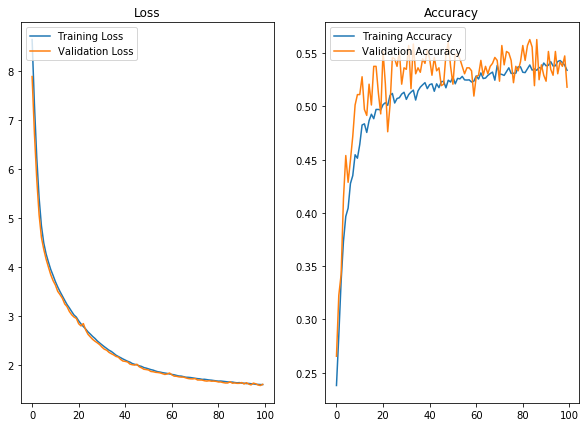

In [79]:
from pylab import rcParams
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')

plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')


plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

In [80]:
#取得預測的類別 (機率值最大的那一個類別)
predict=model.predict_classes(pkgo_val)

In [81]:
#取得預測各類別的機率值
predict_prob=model.predict(pkgo_val)

In [82]:
predict_prob

array([[0.03042578, 0.1523636 , 0.6848569 , 0.01035272, 0.00793394,
        0.11406706],
       [0.0852245 , 0.11262155, 0.09529486, 0.28247645, 0.22360834,
        0.2007743 ],
       [0.03468844, 0.07502739, 0.02802492, 0.39375564, 0.4425204 ,
        0.02598319],
       [0.08329915, 0.20313923, 0.09902759, 0.27159646, 0.30269605,
        0.04024148]], dtype=float32)

In [83]:
predict

array([2, 3, 4, 4])

In [84]:
raw_data = pkgo['class'] #取得label的正確的類別

In [85]:
raw_data[0:4]

0    2
1    5
2    3
3    4
Name: class, dtype: int64

## **Final Test**

In [86]:
valid_loss, valid_acc = model.evaluate(X,y, verbose=0)
print(valid_loss, valid_acc)

1.5941861514741311 0.537031888961792




---




---



In [87]:
id_col = pkgo_test['ID']
id_col.values[0:1792]

array(['MTA5MTEwOTYxMzM0NzA2NDEzNzM=', 'MTY0OTUyMTM2MDExMjg3MjczMjU=',
       'MTQ0ODU1OTEzOTU1NTAyNzI4NjE=', ...,
       'NzA4MTU3NDkyMzYwMzM2NzA2OQ==', 'MjM5NzA0NzA4Nzc5MTUxNDcxNw==',
       'MzI3ODYwNTEzMzU4NDU2NTExNw=='], dtype=object)

In [88]:
pkgo_test = pkgo_test.drop(columns=['ID'])

In [89]:
pkgo_test.head()

,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,pressure,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,...,city_25,city_26,city_27,city_28,city_29,city_30,city_31,city_32,city_33,city_34,city_35,city_36,city_37,city_38,city_39,city_40,city_41,city_42,city_43,city_44,city_45,city_46,city_47,city_48,city_49,city_50,city_51,city_52,city_53,city_54,city_55,city_56,city_57,city_58,city_59,city_60,city_61,city_62,city_63,city_64,city_65,city_66,city_67,city_68,city_69,city_70,city_71,city_72,city_73,city_74,weatherIcon_0,weatherIcon_1,weatherIcon_2,weatherIcon_3,weatherIcon_4,weatherIcon_5,weatherIcon_6,weatherIcon_7,continent_0,continent_1,continent_2,continent_3,continent_4,continent_5,continent_6,continent_7,continent_8,weather_0,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9,weather_10,weather_11,weather_12,weather_13,weather_14,weather_15,weather_16,weather_17,weather_18,weather_19,weather_20,weather_21,weather_22,weather_23,weather_24
0,8,26,0,16.8,2.69,0.573203,0.157344,1,1,1,0,0.298720,0,0,1,1,1,1,0.012588,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,35,1,18.6,13.00,0.339323,0.418839,1,1,1,0,0.212500,0,1,1,1,1,1,0.164427,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,5,1,30.0,9.15,0.534355,0.000000,0,0,0,1,0.409457,0,0,1,1,1,1,0.011713,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,7,38,1,18.5,2.87,0.732558,0.188621,1,1,1,0,0.133233,0,1,1,1,1,1,0.077166,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,27,0,20.2,5.46,0.651956,0.011561,0,0,0,1,0.632449,0,0,0,1,1,1,0.040452,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
result = pd.DataFrame(columns=[ 'ID','class'])
result['class'] = model.predict_classes(pkgo_test)
result.ID =id_col

result




,ID,class
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,2
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,2
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,3
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,4
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,5
...,...,...
1786,MTA5MTg5MTI0Mjc0NDU0NDY3ODE=,5
1787,MTgzODA5ODc2NDU1MDkxOTM4ODU=,2
1788,NzA4MTU3NDkyMzYwMzM2NzA2OQ==,0
1789,MjM5NzA0NzA4Nzc5MTUxNDcxNw==,3


In [91]:
result.to_csv('AT091086.csv',index=False)